##### Imports

In [1]:
import collections
import gc
import json
from matplotlib import pyplot as plt
import numpy as np
import random
import tools
reload(tools)
# gc.collect()

<module 'tools' from 'tools.pyc'>

##### Load data

In [2]:
# Load filters
userIdsToFilter = set()
tools.readUserIdFilters("../bigData/analysis/oneSubredditUsers", userIdsToFilter)
subredditIdToName = tools.read_subreddit_names("../bigData/subredditIdToName")

In [3]:
# Loads months 1 to 5
infilenamePrefix = "../bigData/userSubreddit/RC_2018-0"
# userIdToOldSubreddits = collections.defaultdict(set)
userIdToOldSubreddits = collections.defaultdict(lambda: collections.defaultdict(int))
for i in range(1, 6):
    infilename = infilenamePrefix + str(i)
    tools.getUserIdToSubreddits(infilename, userIdToOldSubreddits, subredditIdToName, userIdsToFilter, True)


Processing ../bigData/userSubreddit/RC_2018-01
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processing ../bigData/userSubreddit/RC_2018-02
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processing ../bigData/userSubreddit/RC_2018-03
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 1

In [3]:
# Loads month 6
infilename = "../bigData/userSubreddit/RC_2018-06"
# userIdToNewSubreddits = collections.defaultdict(set)
userIdToNewSubreddits = collections.defaultdict(lambda: collections.defaultdict(int))
tools.getUserIdToSubreddits(infilename, userIdToNewSubreddits, subredditIdToName, userIdsToFilter, True)
pass

Processing ../bigData/userSubreddit/RC_2018-06
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processed 18000000
Processed 19000000


In [2]:
# Load inputGraph
userIdToOldSubreddits = collections.defaultdict(set)
tools.getUserIdToSubreddits("../bigData/analysis/inputGraph", userIdToOldSubreddits)
pass

Processing ../bigData/analysis/inputGraph
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processed 18000000
Processed 19000000
Processed 20000000
Processed 21000000
Processed 22000000
Processed 23000000
Processed 24000000
Processed 25000000
Processed 26000000
Processed 27000000
Processed 28000000
Processed 29000000
Processed 30000000
Processed 31000000
Processed 32000000
Processed 33000000
Processed 34000000
Processed 35000000
Processed 36000000
Processed 37000000
Processed 38000000
Processed 39000000
Processed 40000000
Processed 41000000
Processed 42000000
Processed 43000000
Processed 44000000
Processed 45000000
Processed 46000000
Processed 47000000
Processed 48000000
Processed 49000000
Processed 50000000
Processed 5100000

##### Old New Analysis

In [3]:
# Simple stats
print "Number of users: {}".format(len(userIdToOldSubreddits))
allSubreddits = set()
for _, subreddits in userIdToOldSubreddits.iteritems():
    allSubreddits.update(subreddits)
print "Number of subreddits: {}".format(len(allSubreddits))
allSubreddits = set()

Number of users: 5374426
Number of subreddits: 143888


In [8]:
# Stats on old vs. new
oldSubredditNums = []
newSubredditNums = []
for userId, oldSubreddits in userIdToOldSubreddits.iteritems():
    oldSubredditNums.append(len(oldSubreddits))
    if userId in userIdToNewSubreddits:
        newSubreddits = userIdToNewSubreddits[userId]
        newSubredditNum = 0
        for subredditId in newSubreddits:
            if subredditId not in oldSubreddits:
                newSubredditNum += 1
        newSubredditNums.append(newSubredditNum)
    else:
        newSubredditNums.append(0)

print "Average number of old subreddits: {}".format(sum(oldSubredditNums)/float(len(oldSubredditNums)))
print "Average number of new subreddits: {}".format(sum(newSubredditNums)/float(len(newSubredditNums)))


100%|██████████| 5374426/5374426 [00:16<00:00, 319484.93it/s]

Average number of old subreddits: 10.3028115002
Average number of new subreddits: 1.36328642352


In [12]:
# Graph on old vs. new
plt.figure()
plt.title("new vs. old subreddits")
plt.xlabel("old subreddits (Jan to May)")
plt.ylabel("new subreddits (June)")
plt.loglog(oldSubredditNums, newSubredditNums, 'b+')
plt.grid(True)
plt.savefig("oldNewSubreddits.png")

##### Distro Analysis

In [3]:
# Original graph subreddit distro preprocess
subredditNums = []
for _, subreddits in userIdToOldSubreddits.iteritems():
    subredditNums.append(len(subreddits))
subredditNums.sort()

xs = []
ys = []
index = -1
for subredditNum in subredditNums:
    if index == -1 or subredditNum != xs[index]:
        xs.append(subredditNum)
        ys.append(1)
        index += 1
    else:
        ys[index] += 1

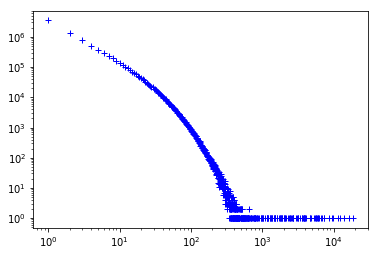

In [4]:
# Original graph subreddit distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

3501977
1


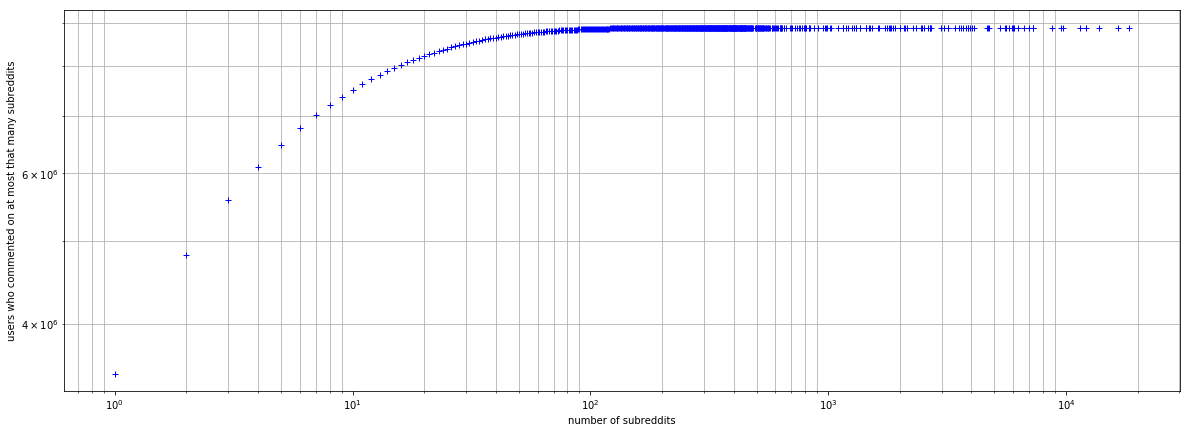

In [42]:
# Original graph cdf
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(20, 7))
plt.xlabel("number of subreddits")
plt.ylabel("users who commented on at most that many subreddits")
plt.loglog(xs, cumulativeYs, "b+")
plt.grid(True, 'minor')
plt.show()

##### Transform and save graph

In [5]:
# Save list of 1-subreddit users to filter out
with open('../bigData/analysis/oneSubredditUsers', 'w') as outfile:
    for userId, subreddits in userIdToOldSubreddits.iteritems():
        if len(subreddits) == 1:
            outfile.write("{}\n".format(userId))


In [3]:
# Builds inputGraph, graph that will be used to evaluate subreddit recommendations
with open('../bigData/analysis/inputGraph', 'w') as outfile:
    for userId, subreddits in userIdToOldSubreddits.iteritems():
        for subreddit, count in subreddits.iteritems():
            outfile.write("{} {} {}\n".format(userId, subreddit, count))

In [6]:
# Builds actualNewSubreddits, answer key for recommendations, in JSON format
# {userId: <string>, newSubreddits: {<stringSubreddit>: <intCount>, ...}}
with open('../bigData/analysis/actualNewSubreddits', 'w') as outfile:
    for userId, newSubreddits in userIdToNewSubreddits.iteritems():
        if userId not in userIdToOldSubreddits:
            continue
            
        userJson = {"userId": userId, "newSubreddits": []}
        for subredditId, count in newSubreddits.iteritems():
            if subredditId not in userIdToOldSubreddits[userId]:
                userJson["newSubreddits"].append({subredditId: count})
        outfile.write(json.dumps(userJson) + "\n")

##### Analysis of actualNewSubreddits

In [2]:
# Load
actualNewSubreddits = tools.loadNewSubreddits("../bigData/analysis/actualNewSubreddits")

Processed 1000000
Processed 2000000
Processed 3000000


In [3]:
# Preprocess
subredditNums = []
for _, subreddits in actualNewSubreddits.iteritems():
    subredditNums.append(len(subreddits))
subredditNums.sort()
print "Active users in June: {}".format(len(actualNewSubreddits))
print "Avg new subreddits (among active users in June): {}".format(sum(subredditNums)/float(len(subredditNums)))

xs = []
ys = []
index = -1
for subredditNum in subredditNums:
    if index == -1 or subredditNum != xs[index]:
        xs.append(subredditNum)
        ys.append(1)
        index += 1
    else:
        ys[index] += 1

Active users in June: 3258157
Avg new subreddits (among active users in June): 2.24878113608


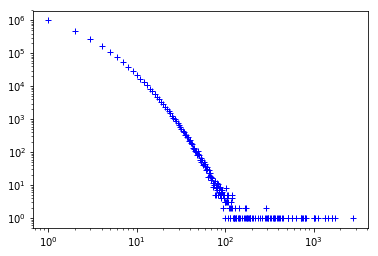

In [4]:
# New subreddits distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

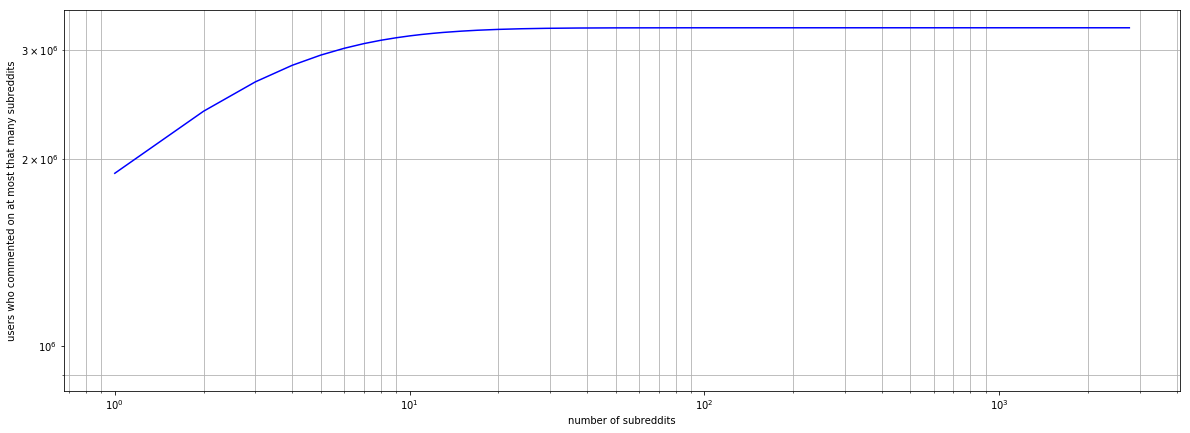

In [6]:
# New subreddits CDF
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(20, 7))
plt.xlabel("number of subreddits")
plt.ylabel("users who commented on at most that many subreddits")
plt.loglog(xs, cumulativeYs, "b-")
plt.grid(True, 'minor')
plt.show()

In [12]:
# New subreddits on a line
print len(actualNewSubreddits) - cumulativeYs[10]
print len(actualNewSubreddits) - cumulativeYs[100]
for userId, subreddits in actualNewSubreddits.iteritems():
    if len(subreddits) > 90 and len(subreddits) < 100:
        print userId
        break

96766
136
lucksmithy


In [16]:
# Output some random subset for dev and test.
newSubredditsList = [(userId, subreddits) for userId, subreddits in actualNewSubreddits.iteritems()]
random.shuffle(newSubredditsList)

with open('../bigData/analysis/actualNewSubredditsDev', 'w') as devfile, \
     open('../bigData/analysis/actualNewSubredditsTest', 'w') as testfile:
    counter = 0
    for userId, subreddits in newSubredditsList:
        if len(subreddits) < 10 or len(subreddits) > 100:
            continue
        
        userJson = {"userId": userId, "newSubreddits": subreddits}
        if counter < 100:
            devfile.write(json.dumps(userJson) + "\n")
        elif counter < 200:
            testfile.write(json.dumps(userJson) + "\n")
        else:
            break
        
        counter += 1

##### Output to prep for collab filtering

In [4]:
# Output indexToUserId, intended to be indexed 0 to len(indexToUserIds) - 1
with open("../bigData/analysis/indexToUserId", 'w') as outfile:
    for userId, _ in userIdToOldSubreddits.iteritems():
        outfile.write(userId + "\n")

In [7]:
# Output subredditVectors, each subreddit represented by list of userIds that commented
# Format is json: {<subredditId>: [<userIdIndex>, ...]}
indexToUserId, userIdToIndex = tools.loadIndexToUserId("../bigData/analysis/indexToUserId")
subredditVectors = collections.defaultdict(list)
for userId, subreddits in userIdToOldSubreddits.iteritems():
    for subreddit in subreddits:
        subredditVectors[subreddit].append(userIdToIndex[userId])
print "Done Generating"        

with open("../bigData/analysis/subredditVectors", 'w') as outfile:
    for subreddit, subredditVector in subredditVectors.iteritems():
        subredditJson = {}
        subredditVector.sort()
        subredditJson[subreddit] = subredditVector
        outfile.write(json.dumps(subredditJson) + "\n")
print "Done Outputting"

Done Generating
Done Outputting


In [3]:
# Modify dev to include the user old subreddits as well
actualNewSubredditsDev = tools.loadNewSubreddits("../bigData/analysis/actualNewSubredditsDev")

with open('../bigData/analysis/oldSubredditsDev', 'w') as outfile:
    for userId in actualNewSubredditsDev:
        oldSubredditList = [subreddit for subreddit in userIdToOldSubreddits[userId]]
        userJson = {"userId": userId, "oldSubreddits": oldSubredditList}
        outfile.write(json.dumps(userJson) + "\n")